As we start, we need to import the module needed for this visualization.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

In [12]:
#Importing Covid CSV file
basedf = pd.read_csv('C:/Users/puter/OneDrive/Desktop/Python/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

basedf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,946,948,949,964,969,981,989,998,1004,1029
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,762,762,762,762,762,763,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,50,52,52,58,60,61,69,70,70


In [13]:
#ASEAN countries list
SEA = ['Indonesia','Malaysia','Singapore','Philippines','Vietnam','Brunei','Laos','Thailand','Cambodia','Burma']

#Manipulating data as preferred form
SEAdf= basedf[basedf['Country/Region'].isin(SEA)].reset_index()
SEAdf= SEAdf.drop(columns=['index','Province/State','Lat','Long'])
SEAdf= SEAdf.set_index(['Country/Region'])
SEAdf= SEAdf.transpose()
SEAdf

#Adding new columns showing new confirmed case each day
for country in SEA:
    SEAdf['plus{}'.format(country)] = SEAdf[country].diff()

SEAdf

Country/Region,Brunei,Cambodia,Indonesia,Malaysia,Philippines,Singapore,Thailand,Vietnam,Laos,Burma,plusIndonesia,plusMalaysia,plusSingapore,plusPhilippines,plusVietnam,plusBrunei,plusLaos,plusThailand,plusCambodia,plusBurma
1/22/20,0,0,0,0,0,0,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,0,0,0,0,0,1,3,2,0,0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
1/24/20,0,0,0,0,0,3,5,2,0,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/25/20,0,0,0,3,0,3,7,2,0,0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1/26/20,0,0,0,4,0,4,8,2,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/22/20,141,123,20796,7137,13597,30426,3037,324,19,199,634.0,78.0,614.0,163.0,0.0,0.0,0.0,0.0,0.0,0.0
5/23/20,141,124,21745,7185,13777,31068,3040,325,19,201,949.0,48.0,642.0,180.0,1.0,0.0,0.0,3.0,1.0,2.0
5/24/20,141,124,22271,7245,14035,31616,3040,325,19,201,526.0,60.0,548.0,258.0,0.0,0.0,0.0,0.0,0.0,0.0
5/25/20,141,124,22750,7417,14319,31960,3042,326,19,203,479.0,172.0,344.0,284.0,1.0,0.0,0.0,2.0,0.0,2.0


We imported the data and show it. There's a lot of countries out there, so we need to select only desired SEA countries.

Below, we start to make our own function. One needed to find when is the first time the country got it citizen infected by COVID - 19. Another function is a plotting function to plot the COVID - 19 New Cases for each day.

In [14]:
#Day Passed vs Confirmed Case

#Function for Deciding Day1

def findday1(country):
    K = SEAdf[SEAdf[country]!= 0]
    listK = list(K.index)
    Day1 = listK[0]
    return Day1

In [15]:
#Plotting Function

def plotvstime(country):
    day1 = findday1(country)
    print('day 1 {} :'.format(country),day1)
    dfneg = SEAdf.loc[day1:]
    dfneg = dfneg.reset_index()
    plt.plot(dfneg['plus{}'.format(country)],label=country)

Now we will started to make our graph. It will shows every countries First Day date and its graph for each day passed. I classified some countries with a lot infected citizen so the graph is easier to see.

day 1 Indonesia : 3/2/20
day 1 Malaysia : 1/25/20
day 1 Singapore : 1/23/20


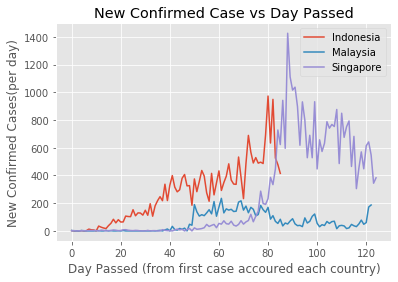

In [16]:
plt.style.use('ggplot')

plotvstime('Indonesia')
plotvstime('Malaysia')
plotvstime('Singapore')

plt.ylabel('New Confirmed Cases(per day)')
plt.xlabel('Day Passed (from first case accoured each country)')
plt.yscale('linear')
plt.title('New Confirmed Case vs Day Passed')


plt.legend()
plt.show()

day 1 Philippines : 1/30/20
day 1 Thailand : 1/22/20
day 1 Vietnam : 1/23/20
day 1 Cambodia : 1/27/20


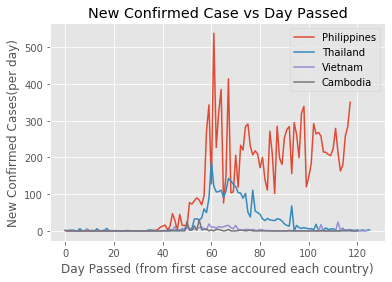

In [17]:
plotvstime('Philippines')
plotvstime('Thailand')
plotvstime('Vietnam')
plotvstime('Cambodia')

plt.ylabel('New Confirmed Cases(per day)')
plt.xlabel('Day Passed (from first case accoured each country)')
plt.yscale('linear')
plt.title('New Confirmed Case vs Day Passed')

plt.legend()
plt.show()

day 1 Brunei : 3/9/20
day 1 Laos : 3/24/20
day 1 Burma : 3/27/20


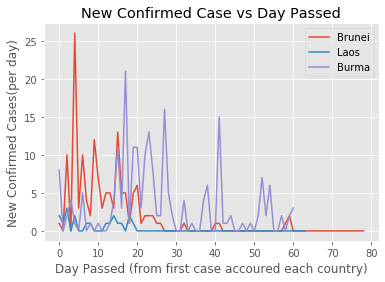

In [18]:
plotvstime('Brunei')
plotvstime('Laos')
plotvstime('Burma')

plt.ylabel('New Confirmed Cases(per day)')
plt.xlabel('Day Passed (from first case accoured each country)')
plt.yscale('linear')
plt.title('New Confirmed Case vs Day Passed')


plt.legend()
plt.show()

Now we already see the graph. Now we might get the idea of what country that good dealing with this pandemic. Please pay attention to the y ticks. The last graph have a lower y ticks(25 max).

Next you will see the plot that I made between New Confirmed Case vs Total Confirmed Case. This graph give us the idea how Covid - 19 journey everytime the total confirmed case is reached. The dropped New Confirmed Case tell us some good idea that the country dealing with the pandemic greatly when the total confirmed case reached that number.

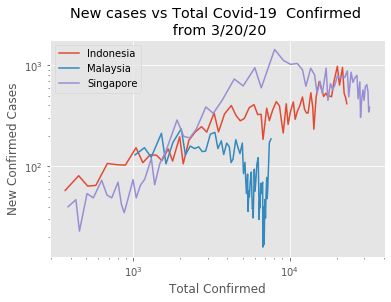

In [19]:
#Total Confirmed Case vs New Confirmed Case

SEAdf20mar= SEAdf.loc['3/20/20':] #set the starting date as desired

fig,ax = plt.subplots()
indo = plt.plot(SEAdf20mar['Indonesia'],SEAdf20mar['plusIndonesia'],label='Indonesia')
malay = plt.plot(SEAdf20mar['Malaysia'],SEAdf20mar['plusMalaysia'],label='Malaysia')
sing = plt.plot(SEAdf20mar['Singapore'],SEAdf20mar['plusSingapore'],label='Singapore')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Confirmed')
plt.ylabel('New Confirmed Cases')
plt.title('New cases vs Total Covid-19  Confirmed \n from 3/20/20')
plt.legend()

plt.show()

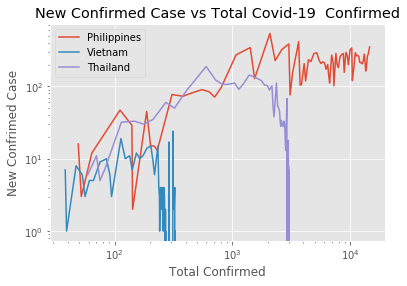

In [20]:
SEAdf11mar = SEAdf.loc['3/11/20':] #set the starting date

fig,ax = plt.subplots()
plt.plot(SEAdf11mar['Philippines'],SEAdf11mar['plusPhilippines'],label='Philippines')
plt.plot(SEAdf11mar['Vietnam'],SEAdf11mar['plusVietnam'],label='Vietnam')
plt.plot(SEAdf11mar['Thailand'],SEAdf11mar['plusThailand'],label='Thailand')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Confirmed')
plt.ylabel('New Confrimed Case')
plt.title('New Confirmed Case vs Total Covid-19  Confirmed')
plt.legend()

plt.show()

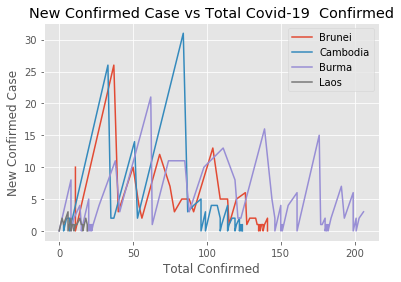

In [21]:
#Taking the countries that have only a few confirmed case

SEAdf11mar = SEAdf.loc['3/11/20':] #set the starting date

fig,ax = plt.subplots()

plt.plot(SEAdf11mar['Brunei'],SEAdf11mar['plusBrunei'],label='Brunei')
plt.plot(SEAdf11mar['Cambodia'],SEAdf11mar['plusCambodia'],label='Cambodia')
plt.plot(SEAdf11mar['Burma'],SEAdf11mar['plusBurma'],label='Burma')
plt.plot(SEAdf11mar['Laos'],SEAdf11mar['plusLaos'],label='Laos')

#linear plot is a better choice
plt.xlabel('Total Confirmed')
plt.ylabel('New Confirmed Case')
plt.title('New Confirmed Case vs Total Covid-19  Confirmed')
plt.legend()

plt.show()

Notice how countries that have high new Confirmed case have a different y ticks. I make the y ticks increase logaritmic. It give us a better Idea for this graph because how New Confirmed Case can increase and drop exponentially everytime Total Confirmed case is announced.